In [ ]:
# Initial imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn.linear_model

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score 

data = ('/content/model_df.csv')
model_df = pd.read_csv(data)

In [ ]:
# change zip code to string and reformat
model_df['ZIP_CODE'] = model_df['ZIP_CODE'].apply(lambda x: '0' + str(x) if x < 10000 else str(x))

# set ZIP_CODE as index
model_df = model_df.set_index('ZIP_CODE')

model_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,
03266,0,2,0,0,1,0,851.0,54904.0,0
07001,0,1,0,0,1,0,5022.0,69849.0,173
07003,0,12,5,4,1,3,18577.0,78034.0,795
07004,0,6,3,0,1,2,2621.0,122063.0,1
07004,0,6,3,0,1,2,2621.0,122063.0,306


In [ ]:
# model_df = model_df[model_df.REG_COUNTS != 0]
# model_df

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2750 entries, 03266 to 99403
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EV_LEVEL_1                  2750 non-null   int64  
 1   EV_LEVEL_2                  2750 non-null   int64  
 2   EV_FAST                     2750 non-null   int64  
 3   NETWORK_TYPE_ChargePoint    2750 non-null   int64  
 4   NETWORK_TYPE_Non-Networked  2750 non-null   int64  
 5   NETWORK_TYPE_Other-Network  2750 non-null   int64  
 6   TOTAL_HOUSEHOLDS            2750 non-null   float64
 7   MEDIAN_INCOME               2750 non-null   float64
 8   REG_COUNTS                  2750 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 214.8+ KB


In [ ]:
model_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
count,2750.000000,2750.000000,2750.00000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,0.301091,8.397091,1.78000,2.068727,0.711636,1.513818,8922.500727,73908.358182,604.656000
std,2.185196,14.023915,3.91339,4.729804,1.451323,2.403236,6853.592855,30309.653408,1737.735342
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,25.000000,10804.000000,0.000000
25%,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,3295.000000,52944.000000,2.000000
50%,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,7928.500000,66823.500000,61.000000
75%,0.000000,9.000000,1.00000,2.000000,1.000000,2.000000,12938.250000,89307.500000,413.250000
max,48.000000,227.000000,38.00000,85.000000,45.000000,29.000000,41355.000000,240507.000000,29672.000000


<function matplotlib.pyplot.show>

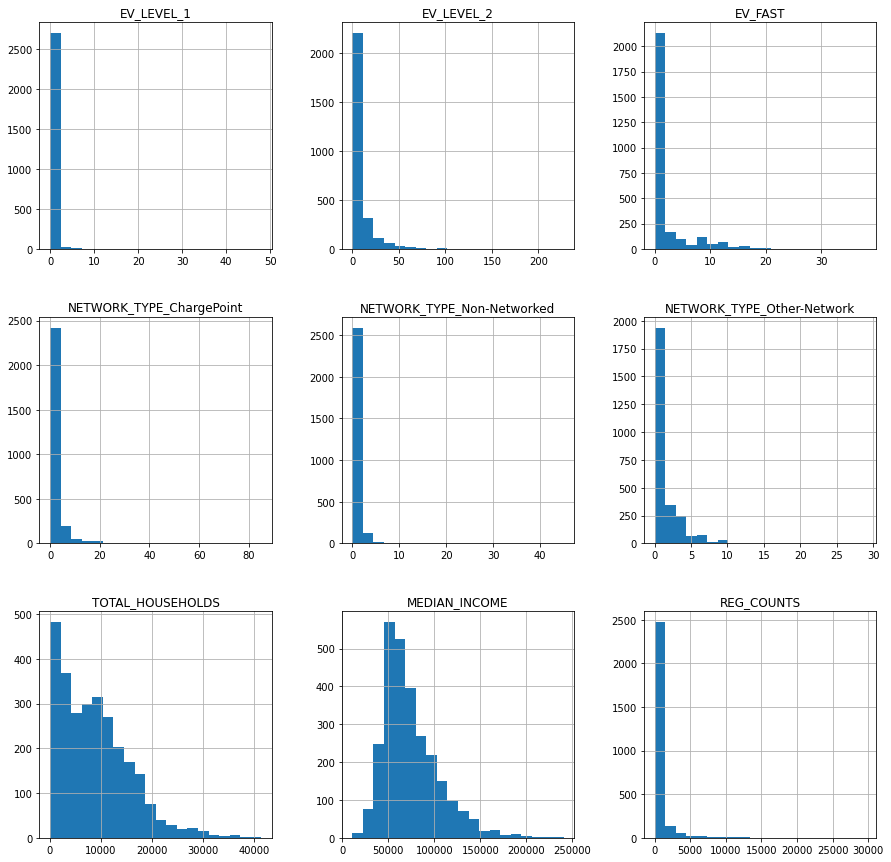

In [ ]:
model_df.hist(bins=20, figsize=(15,15))
plt.show

In [ ]:
corr_matrix = model_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
EV_LEVEL_2                    0.257509
MEDIAN_INCOME                 0.252937
NETWORK_TYPE_Other-Network    0.252264
TOTAL_HOUSEHOLDS              0.244381
NETWORK_TYPE_ChargePoint      0.235954
EV_FAST                       0.108111
NETWORK_TYPE_Non-Networked    0.035622
EV_LEVEL_1                    0.004127
Name: REG_COUNTS, dtype: float64

<function scatter_matrix at 0x7fbaff3994d0>


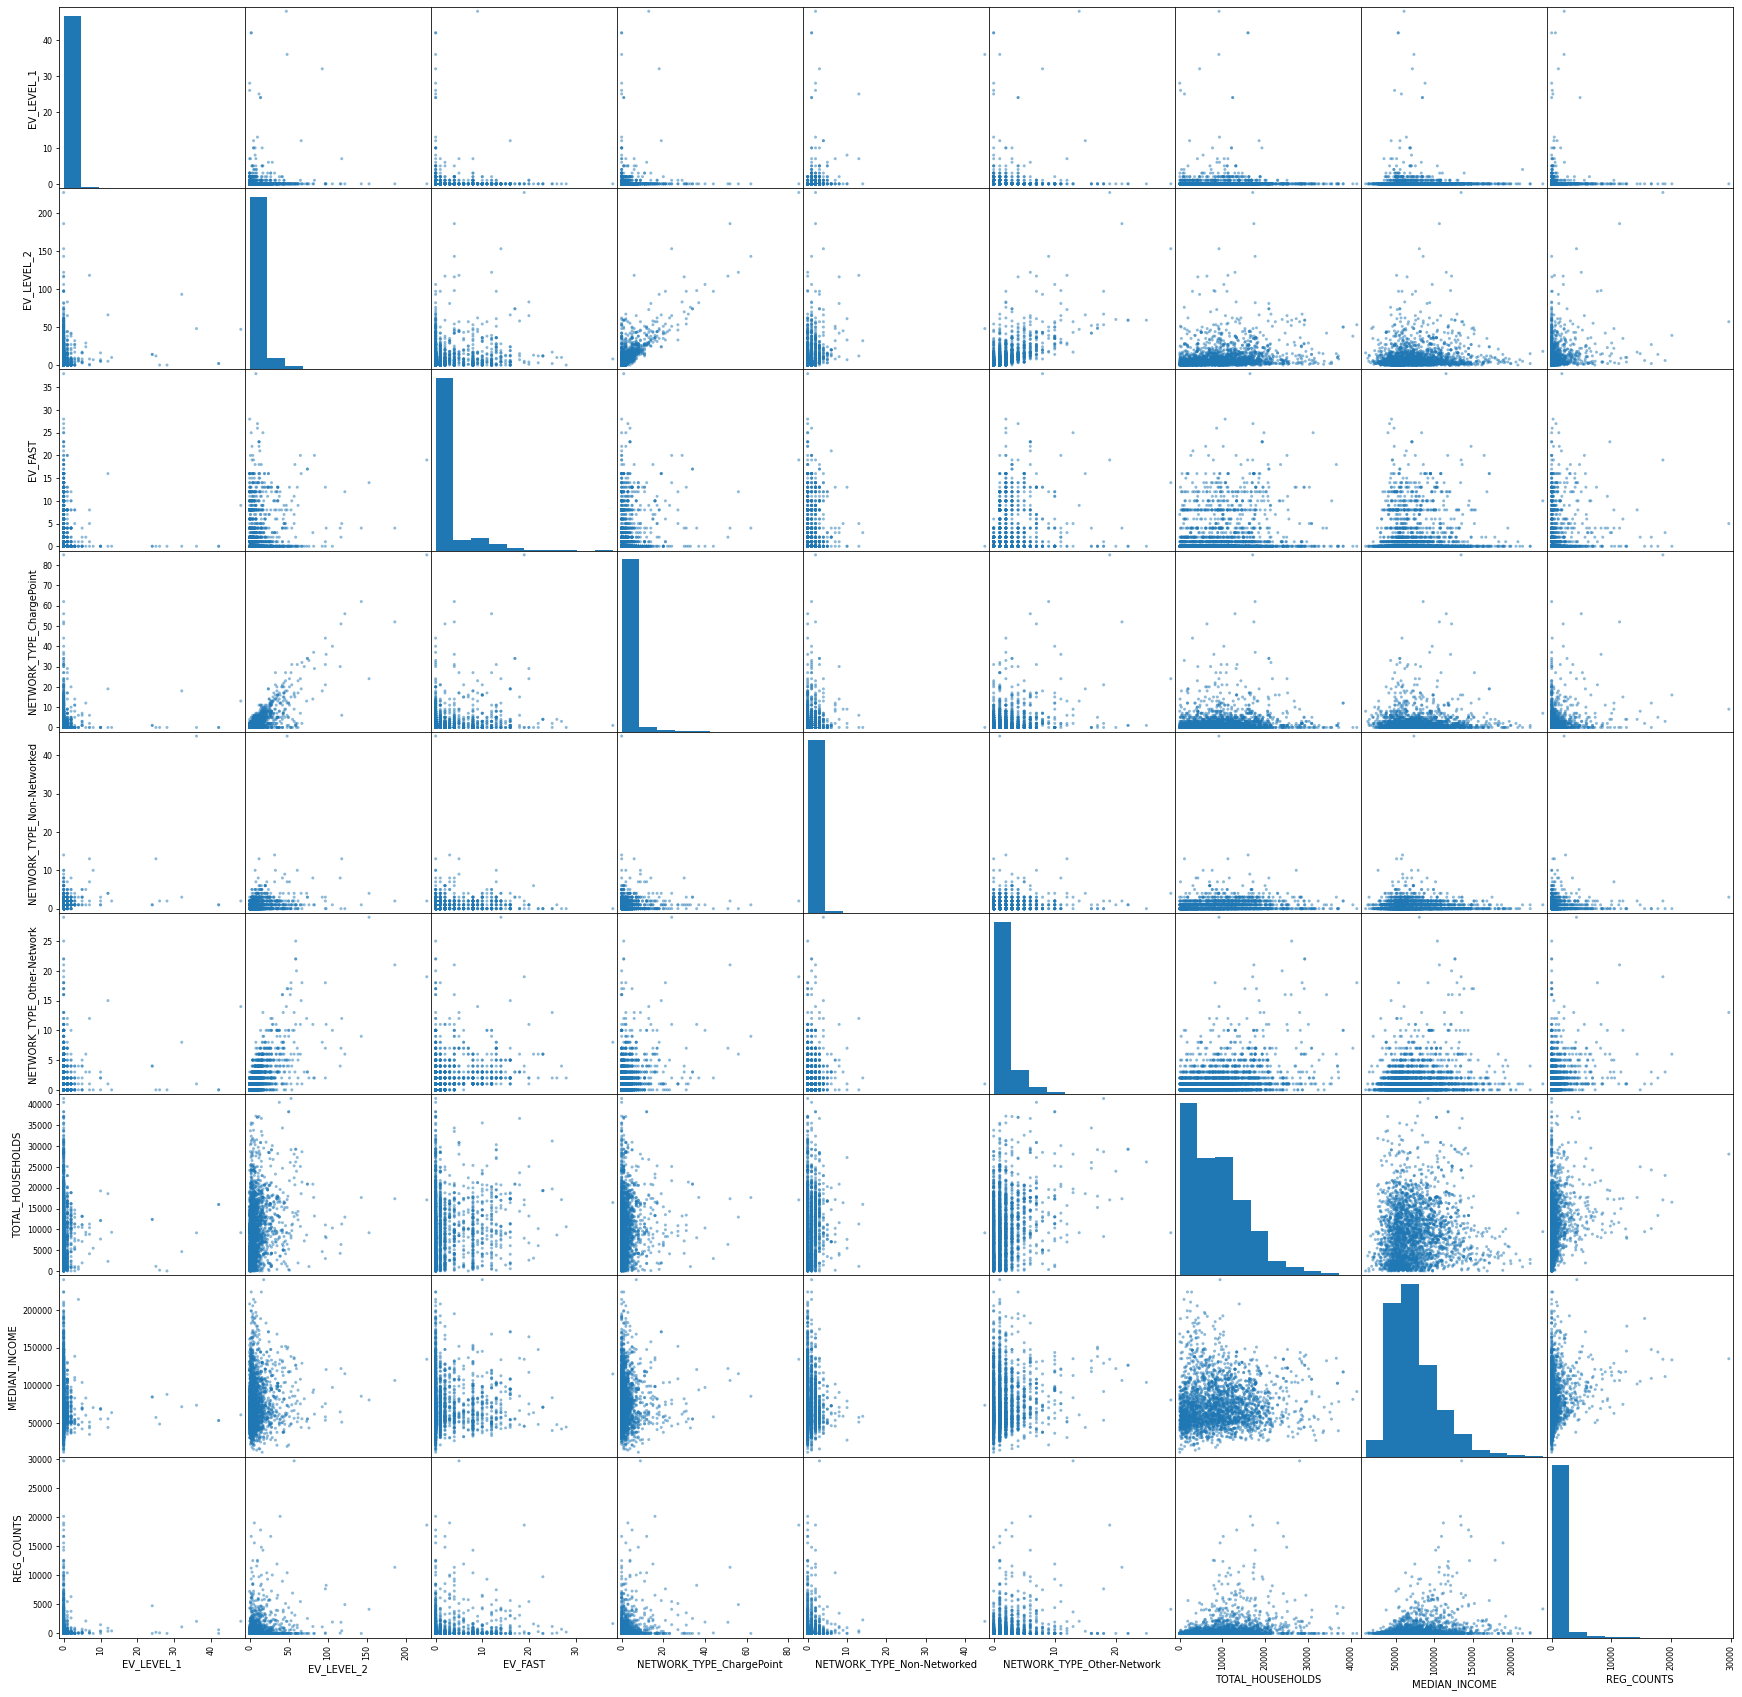

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST',
              'NETWORK_TYPE_ChargePoint', 'NETWORK_TYPE_Non-Networked', 'NETWORK_TYPE_Other-Network',
              'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
              'REG_COUNTS']

#attributes = ['EV_LEVEL_2',
#              'NETWORK_TYPE_Other-Network',
#              'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
#              'REG_COUNTS']

scatter_matrix(model_df[attributes], figsize=(30, 30))
print(scatter_matrix)

In [ ]:
y = model_df.REG_COUNTS
y.shape

(2750,)

In [ ]:
X = model_df.MEDIAN_INCOME.values.reshape(-1,1)
X.shape

(2750, 1)

In [ ]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear Regression

In [ ]:
# Train the model using the training sets
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
y_pred = lin_model.predict(X_test)
print(y_pred.shape)

(550,)


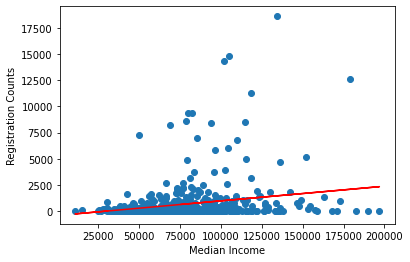

In [ ]:
plt.scatter(X_test, y_test)
plt.xlabel('Median Income')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.01400971]
Mean squared error: 3131593.30
Coefficient of determination: 0.07


# SVM

In [ ]:
model_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,
03266,0,2,0,0,1,0,851.0,54904.0,0
07001,0,1,0,0,1,0,5022.0,69849.0,173
07003,0,12,5,4,1,3,18577.0,78034.0,795
07004,0,6,3,0,1,2,2621.0,122063.0,1
07004,0,6,3,0,1,2,2621.0,122063.0,306
...,...,...,...,...,...,...,...,...,...
99352,0,13,3,1,1,4,12877.0,81410.0,3411
99354,36,48,0,0,45,1,9175.0,73369.0,2082
99361,0,1,0,0,0,1,750.0,69118.0,100


In [ ]:
y = model_df['REG_COUNTS']
X = model_df.drop(columns='REG_COUNTS')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1726, 8)

In [ ]:
svm_model = svm.SVR()

In [ ]:
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = svm_model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,47.895255,982
1,35.034615,723
2,44.292363,634
3,25.480859,574
4,82.535138,1623


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

ValueError: ignored